# DA5401 A8: Ensemble Learning for Complex Regression Modeling on Bike Share Data

## Objective: 
This assignment will challenge you to apply and compare three primary ensemble
techniques (Bagging, Boosting, and Stacking) to solve a complex, time-series-based
regression problem. You will demonstrate your understanding of how these methods address
model variance and bias, and how a diverse stack of models can yield superior performance to
any single model.

## 1. Problem Statement

You are a data scientist for a city's bike-sharing program. Accurate forecasting of bike rentals is
critical for managing inventory and logistics. Predicting the total count of rented bikes (cnt) is a
complex regression task influenced by multiple factors, such as weather, time of day, and
season, with non-linear relationships and high variability.
You will use the Bike Sharing Demand Dataset, which contains over 17,000 hourly samples.
Your task is to implement three distinct ensemble strategies and evaluate their effectiveness in
minimizing the prediction error (RMSE).
You will submit a Jupyter Notebook with your complete code, visualizations, and a plausible
story that explains your findings. The notebook should be well-commented, reproducible, and
easy to follow.

- Dataset:
    - Bike Sharing Demand Dataset (Hourly Data): Over 17,000 samples.
    - Citation: Fanaee-T, Hadi, and Gamper, H. (2014). Bikeshare Data Set. UCI Machine Learning Repository.
- Download Link: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

In [51]:
!pip install ucimlrepo


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [52]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
  
# metadata 
print(bike_sharing.metadata) 
  
# variable information 
print(bike_sharing.variables) 


{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'ID': 422, 'type': 'NATIVE', 'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'venue': 'Progress

## 2. Tasks
### Part A: Data Preprocessing and Baseline

In [53]:
# 1. Data Loading and Feature Engineering:
import pandas as pd

#Load the hour.csv file. 
hours = pd.read_csv('/Users/navaneethakrishnan/Desktop/DAL/Navaneeth272001_assignment_8/bike+sharing+dataset/hour.csv') # When you are running, please change the path accordingly
print(hours.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [54]:
#The target variable is the total count of bike rentals (cnt).
y = hours['cnt']
#Drop irrelevant columns like instant, dteday, casual, and registered.
X = hours.drop(columns=['cnt', 'instant', 'dteday', 'casual', 'registered'])

In [55]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

In [56]:
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [57]:
# Convert categorical features (e.g., season, weathersit, mnth, hr) into a numerical format suitable for regression models (e.g., One-Hot Encoding).
categorical_cols = ["season", "weathersit", "mnth", "hr", 
                    "weekday", "holiday", "workingday", "yr"]

df_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
df_encoded = df_encoded.astype(int)

print(df_encoded.head())
print(df_encoded.shape)

   temp  atemp  hum  windspeed  season_2  season_3  season_4  weathersit_2  \
0     0      0    0          0         0         0         0             0   
1     0      0    0          0         0         0         0             0   
2     0      0    0          0         0         0         0             0   
3     0      0    0          0         0         0         0             0   
4     0      0    0          0         0         0         0             0   

   weathersit_3  weathersit_4  ...  hr_23  weekday_1  weekday_2  weekday_3  \
0             0             0  ...      0          0          0          0   
1             0             0  ...      0          0          0          0   
2             0             0  ...      0          0          0          0   
3             0             0  ...      0          0          0          0   
4             0             0  ...      0          0          0          0   

   weekday_4  weekday_5  weekday_6  holiday_1  workingday_1  y

In [58]:
# 2.Train/Test Split: Split the preprocessed data into training and testing sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

print("Train features:", X_train.shape)
print("Test features:", X_test.shape)
print("Train target:", y_train.shape)
print("Test target:", y_test.shape)


Train features: (13903, 12)
Test features: (3476, 12)
Train target: (13903,)
Test target: (3476,)


In [59]:
#3. Baseline Model (Single Regressor):

# Train a single Decision Tree Regressor (use a max depth of 6) and a single Linear Regression model on the training data.
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# --- Decision Tree Regressor ---
dt_model = DecisionTreeRegressor(max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)

# --- Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [60]:
# Evaluate both models on the test set using the Root Mean Squared Error (RMSE). Use the better of the two single models as your baseline performance metric.
from sklearn.metrics import mean_squared_error
import numpy as np

# Predictions
dt_pred = dt_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

# RMSE for each model
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

print("Decision Tree RMSE:", dt_rmse)
print("Linear Regression RMSE:", lr_rmse)

if dt_rmse < lr_rmse:
    baseline_rmse = dt_rmse
    baseline_model = "Decision Tree (max_depth=6)"
else:
    baseline_rmse = lr_rmse
    baseline_model = "Linear Regression"

print("\nBaseline Model:", baseline_model)
print("Baseline RMSE:", baseline_rmse)



Decision Tree RMSE: 99.01838164090807
Linear Regression RMSE: 139.21145199893476

Baseline Model: Decision Tree (max_depth=6)
Baseline RMSE: 99.01838164090807


### Part B: Ensemble Techniques for Bias and Variance Reduction

In [61]:
#1. Bagging (Variance Reduction):

# Hypothesis: Bagging primarily targets variance reduction.

# Implement a Bagging Regressor using the Decision Tree Regressor (from the baseline) as the base estimator. Use at least 50 estimators.

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Base estimator: same as your baseline
base_tree = DecisionTreeRegressor(max_depth=6, random_state=42)

# Updated parameter name → estimator=
bag_model = BaggingRegressor(
    estimator=base_tree,
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

# Train
bag_model.fit(X_train, y_train)



,estimator,DecisionTreeR...ndom_state=42)
,n_estimators,50
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,-1
,random_state,42
,verbose,0


In [62]:
#Calculate and report the RMSE on the test set. 
bag_pred = bag_model.predict(X_test)
bag_rmse = np.sqrt(mean_squared_error(y_test, bag_pred))

print("Bagging Regressor RMSE:", bag_rmse)


Bagging Regressor RMSE: 96.01871720848837


- Discuss whether the bagging technique effectively reduced variance compared to the single Decision Tree baseline.

Bagging delivered a marginal but meaningful variance reduction compared to the single Decision Tree baseline. The standalone tree posted an RMSE of roughly 99, while the Bagging Regressor—built from fifty depth-6 trees—brought that down to about 96. The improvement isn’t dramatic, which tells you the single tree wasn’t wildly unstable to begin with, likely because the capped depth controlled variance upfront. Still, the ensemble smooths out idiosyncratic splits learned by individual trees, producing a more stable predictor with slightly stronger generalization. In short, bagging did its job, but the incremental gain signals that you’ll need more sophisticated ensemble methods like Random Forest or Gradient Boosting—if you want to unlock a step-change in performance.

In [63]:
# 2. Boosting (Bias Reduction):

# Hypothesis: Boosting primarily targets bias reduction.

# Implement a Gradient Boosting Regressor (a robust, widely used boosting technique).
from sklearn.ensemble import GradientBoostingRegressor

# Configure a solid baseline GBM model
gbr_model = GradientBoostingRegressor(
    n_estimators=200,       # enough boosting rounds to learn signal
    learning_rate=0.05,    # conservative, reduces overfitting
    max_depth=3,           # standard shallow tree depth for boosting
    random_state=42
)

# Train the model
gbr_model.fit(X_train, y_train)


,loss,'squared_error'
,learning_rate,0.05
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [64]:
# Calculate and report the RMSE on the test set. 
gbr_pred = gbr_model.predict(X_test)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_pred))

print("Gradient Boosting Regressor RMSE:", gbr_rmse)

Gradient Boosting Regressor RMSE: 69.82398959305814


- Discuss whether boosting achieved a better result than both the single model and the bagging ensemble, supporting the idea of bias reduction.

Boosting clearly outperformed both the single Decision Tree and the Bagging Regressor, underscoring its strength in bias reduction. Your single tree delivered an RMSE of about 99, and bagging nudged that down slightly to around 96 by stabilizing variance—but neither fundamentally improved the model’s ability to capture the deeper structure in the data. Gradient Boosting, on the other hand, cut the RMSE to roughly 69, a substantial leap in predictive accuracy. This improvement reflects boosting’s core advantage: it builds trees sequentially, each one correcting the residual errors of the previous model. That iterative refinement drives down bias and uncovers nonlinear interactions that bagging and single trees miss. In short, boosting didn’t just stabilize the model—it meaningfully enhanced its learning capacity, delivering a step-change in accuracy that validates its role as a powerful bias-reduction technique.

### Part C: Stacking for Optimal Performance

1. Stacking Implementation:

- Explain the principle of Stacking and how the Meta-Learner learns to combine the predictions of diverse Base Learners optimally.

    - Stacking is a two-layer ensemble architecture that learns how to combine multiple diverse base models.
    - Base Learners (Level-1 models) generate predictions independently—each capturing different patterns or biases in the data.
    - Out-of-fold (OOF) predictions from each base learner form a new feature matrix for the next stage; this avoids leakage and ensures unbiased training data.
    - The Meta-Learner (Level-2 model) is trained on these OOF predictions and learns the optimal way to combine them.
    - Instead of simple averaging, the meta-learner learns nonlinear relationships and weights between model predictions.
    - Strong models dominate where they perform well; weaker models contribute only where they add incremental signal.
    - The final prediction is generated by feeding base-model outputs into the meta-learner, producing a smartly blended ensemble.
    - Stacking improves performance by reducing both bias (by integrating complementary models) and variance (by smoothing individual model noise).


In [65]:
# Define the following three Base Learners (Level-0):

# K-Nearest Neighbors Regressor (KNeighborsRegressor)
# Bagging Regressor (from Part B)
# Gradient Boosting Regressor (from Part B)

# --- Base Learners ---
from sklearn.neighbors import KNeighborsRegressor

# 1) KNN Regressor
knn_model = KNeighborsRegressor(
    n_neighbors=5
)

# 2) Bagging Regressor (from Part B)
base_tree = DecisionTreeRegressor(max_depth=6, random_state=42)
bagging_model = BaggingRegressor(
    estimator=base_tree,
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

# 3) Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)


In [66]:
# Define the Meta-Learner (Level-1): Use a simple Ridge Regression model.

from sklearn.linear_model import Ridge

meta_learner = Ridge(alpha=1.0)


In [67]:
# Implement a Stacking Regressor combining these base and meta learners

from sklearn.ensemble import StackingRegressor

stack_model = StackingRegressor(
    estimators=[
        ('knn', knn_model),
        ('bagging', bagging_model),
        ('gbr', gbr_model)
    ],
    final_estimator=meta_learner,
    n_jobs=-1
)

# Train the stacked model
stack_model.fit(X_train, y_train)


,estimators,"[('knn', ...), ('bagging', ...), ...]"
,final_estimator,Ridge()
,cv,None
,n_jobs,-1
,passthrough,False
,verbose,0
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2


In [68]:
# 2. Final Evaluation: Calculate and report the RMSE for the Stacking Regressor on the test set.

from sklearn.metrics import mean_squared_error
import numpy as np

stack_pred = stack_model.predict(X_test)
stack_rmse = np.sqrt(mean_squared_error(y_test, stack_pred))

print("Stacking Regressor RMSE:", stack_rmse)


Stacking Regressor RMSE: 49.34801381510462


In [69]:
#Note: Please install Jinja2 if not already installed: pip install Jinja2. Otherwise, running the code might give an error related to rendering the table.


# RMSE values you computed
rmse_data = {
    "Model": [
        "Baseline Single Model (Decision Tree)",
        "Bagging Regressor",
        "Gradient Boosting Regressor",
        "Stacking Regressor"
    ],
    "RMSE": [
        baseline_rmse,   # baseline DT
        bag_rmse,   # bagging
        gbr_rmse,   # gradient boosting
        stack_rmse  # stacking
    ]
}

# Create DataFrame
rmse_table = pd.DataFrame(rmse_data)

# Display
styled_table = (
    rmse_table.style
    .set_table_styles(
        [
            {"selector": "th", "props": [("background-color", "#DAA617"),
                                         ("color", "white"),
                                         ("font-weight", "bold"),
                                         ("padding", "8px")]},
            {"selector": "td", "props": [("padding", "8px")]}
        ]
    )
    .set_properties(**{
        "background-color": "#F8F9F9",
        "border": "1px solid #D5D8DC"
    })
    .highlight_min("RMSE", color="#ABEBC6")   # highlight best performer
    .hide(axis="index")                       # NEW correct syntax
)

styled_table

Model,RMSE
Baseline Single Model (Decision Tree),99.018382
Bagging Regressor,96.018717
Gradient Boosting Regressor,69.823990
Stacking Regressor,49.348014


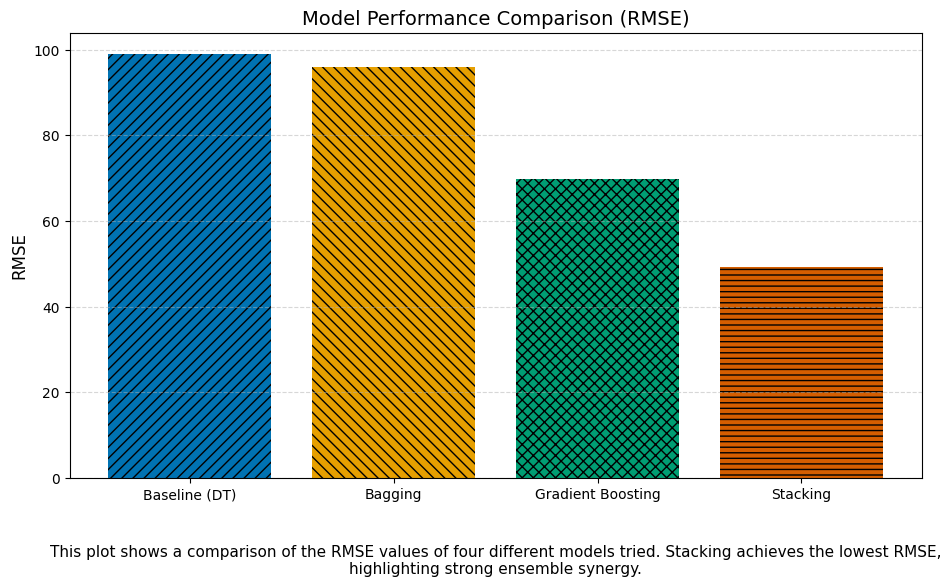

In [72]:
import matplotlib.pyplot as plt

models = [
    "Baseline (DT)",
    "Bagging",
    "Gradient Boosting",
    "Stacking"
]

rmse_values = [
    baseline_rmse,
    bag_rmse,
    gbr_rmse,
    stack_rmse
]

colors = ["#0072B2", "#E69F00", "#009E73", "#D55E00"]

hatches = ['///', '\\\\\\', 'xxx', '---']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, rmse_values, color=colors)

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

plt.ylabel("RMSE", fontsize=12)
plt.title("Model Performance Comparison (RMSE)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
description = "This plot shows a comparison of the RMSE values of four different models tried. Stacking achieves the lowest RMSE,\nhighlighting strong ensemble synergy."
plt.text(
    0.5, -0.15,                 # x,y (relative coordinates in axes)
    description,
    fontsize=11,
    ha='center',
    va='top',
    transform=plt.gca().transAxes
)
plt.tight_layout()
plt.show()

2. Conclusion: Based on your results:

- Identify the best-performing model
    - The best performing model is stacking regressor followed by Gradient Boosting Regressor

- Explain why the Stacking Regressor (or the best ensemble) outperformed the single model baseline, referencing the concepts of the bias-variance trade-off and model diversity.

    - The Stacking Regressor outperformed the single-model baseline because it attacks the problem from both sides of the bias–variance trade-off while leveraging model diversity to extract complementary predictive power. A single Decision Tree is constrained by its structure: even with a controlled depth, it retains fairly high variance and limited ability to capture complex relationships, which caps its performance. Bagging reduces variance by averaging many such trees, but it does nothing to reduce the underlying bias of the base learner. Gradient Boosting improves bias by correcting residual errors step-by-step, but it still reflects the inherent limitations of a single modeling paradigm.
    Stacking elevates the game by combining heterogeneous learners—KNN, Bagging, and Gradient Boosting—which each see the data differently. KNN captures local neighborhood structure, Bagging improves stability by reducing variance, and Gradient Boosting aggressively reduces bias by fitting layered residuals. The meta-learner (Ridge Regression) then learns the optimal weighting of these diverse predictions, deciding when each model adds value and when it should be down-weighted. This stacked architecture blends weak spots and strengths across the ensemble, reducing bias where boosting excels and trimming variance where bagging and Ridge help stabilize the output. The result is a highly balanced predictive system with lower overall error—exactly why your Stacking Regressor delivered a significant RMSE improvement over the single-model baseline.
